In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
    

In [ ]:
# load dataset
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)[:5000]

batch_size=64 
train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
images_train, labels_train = iter(train_loader).next()
print(torch.max(images_train))
print(images_train.shape)

tensor(1.)
torch.Size([64, 1, 28, 28])


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    # encoder: 
    # conv 
    # relu
    # conv 
    # relu
    # conv
    self.encoder = nn.Sequential(
                   nn.Conv2d(1,10,kernel_size=4,stride=2,padding=1),
                   nn.ReLU(),
                   nn.Conv2d(10,20,kernel_size=4,stride=2,padding=1),
                   nn.ReLU(),
                   nn.Conv2d(20,40,kernel_size=7,stride=1,padding=0))

    # decoder: 
    # conv_T
    # relu
    # conv_T
    # relu
    # conv_T
    self.decoder = nn.Sequential(
                   nn.ConvTranspose2d(40,20,kernel_size=7,stride=1,padding=0),
                   nn.ReLU(),
                   nn.ConvTranspose2d(20,10,kernel_size=4,stride=2,padding=1),
                   nn.ReLU(),
                   nn.ConvTranspose2d(10,1,kernel_size=4,stride=2,padding=1),
                   nn.Sigmoid())
  
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [ ]:
model = Autoencoder()

criterion = nn.MSELoss()
learning_rate=0.001
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

In [ ]:
max_epochs = 20
outputs = []

for epoch in range(max_epochs):
  for data in train_loader:
    images = data[0]
    preds = model(images)
    loss = criterion(preds,images)
    
    loss.backward()  
    optimizer.step()
    optimizer.zero_grad() 

  print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
  # save the last batch(input and output) per epoch
  outputs.append([images, preds])


Epoch:1, Loss:0.0554
Epoch:2, Loss:0.0672
Epoch:3, Loss:0.0561
Epoch:4, Loss:0.0474
Epoch:5, Loss:0.0451
Epoch:6, Loss:0.0297
Epoch:7, Loss:0.0258
Epoch:8, Loss:0.0141
Epoch:9, Loss:0.0148
Epoch:10, Loss:0.0146
Epoch:11, Loss:0.0160
Epoch:12, Loss:0.0073
Epoch:13, Loss:0.0106
Epoch:14, Loss:0.0179
Epoch:15, Loss:0.0102
Epoch:16, Loss:0.0091
Epoch:17, Loss:0.0061
Epoch:18, Loss:0.0101
Epoch:19, Loss:0.0061
Epoch:20, Loss:0.0060


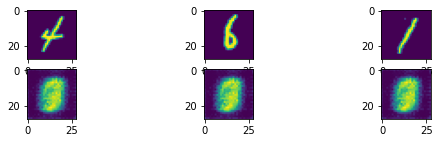

In [ ]:
# The prediction from the first epoch
plt.figure(figsize=(9, 2))
images = outputs[0][0].detach().numpy()
preds = outputs[0][1].detach().numpy()

for i in range(3):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i][0])

for i in range(3):
  plt.subplot(2, 3, 3+i+1)
  plt.imshow(preds[i][0])


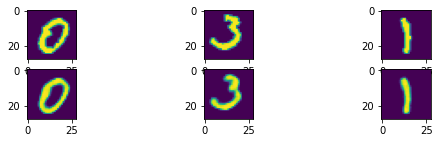

In [ ]:
# The prediction from the last epoch
plt.figure(figsize=(9, 2))
images = outputs[-1][0].detach().numpy()
preds = outputs[-1][1].detach().numpy()

for i in range(3):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i][0])

for i in range(3):
  plt.subplot(2, 3, 3+i+1)
  plt.imshow(preds[i][0])
